In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_train.head()

,id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,final_status
0,train_00000,Homo Sapiens - A Species Gone Ape,"Homo Sapiens A Species Gone Ape, is a narrativ...",11250.0,homo-sapiens-a-species-gone-ape,False,US,USD,1393531464,1393531464,1388503014,1390939464,0
1,train_00001,Manoa Journal of Fried and Half-Fried Ideas ab...,The Fried Journal is about exploring the futur...,2100.0,manoa-journal-of-fried-and-half-fried-ideas-about,False,US,USD,1323558480,1323558481,1319762221,1320128440,0
2,train_00002,Become a Special Friend to RAW GERONIMO,RAW GERONIMO are looking to shoot a music vide...,2000.0,become-a-special-friend-to-raw-geronimo,False,US,USD,1325732983,1325732983,1322956721,1323140983,0
3,train_00003,Field Trip to the Sunrise: A Chicago Kids Adv...,...About a 2nd grader who happens to have a te...,4000.0,field-trip-to-the-sunrise-a-chicago-kids-adven...,False,US,USD,1369972740,1369972740,1368190634,1368493243,0
4,train_00004,Ciara's Bakery and Cafe,My dream is to open up a full service bakery a...,40000.0,ciaras-bakery-and-cafe,False,US,USD,1429209087,1429209087,1423516929,1426617087,0


In [4]:
df_train["disable_communication"].value_counts()

disable_communication
False    75473
True       217
Name: count, dtype: int64

In [6]:
# UNIXタイムの変換
time__tmp = pd.to_datetime(df_train["created_at"], unit="s")
time__tmp.sort_values()

69640   2009-04-24 19:15:07
63427   2009-04-28 21:46:20
33931   2009-04-28 23:10:24
16890   2009-04-29 00:09:55
75507   2009-04-29 16:40:26
                ...        
16936   2015-05-19 21:20:43
18011   2015-05-20 20:21:27
15543   2015-05-21 20:09:17
28194   2015-05-22 11:25:35
30161   2015-05-22 20:06:40
Name: created_at, Length: 75690, dtype: datetime64[ns]

In [31]:
# キーワードの総数を知りたい

N = 1000

keywords = df_train["keywords"].copy().iloc[:N]
keywords_tolist = [v.split("-") for v in keywords.values]

keywords_tolist

tmp = set()
for v in keywords_tolist:
    tmp = tmp | set(v)

df_keywords = pd.DataFrame(
    columns=list(tmp)
)

for i, v in enumerate(keywords_tolist):
    df_keywords_add = pd.DataFrame(
        {word: 1 for word in v}, index=[i]
    )
    df_keywords = pd.concat(
        [df_keywords, df_keywords_add], axis="index"
    )
df_keywords = df_keywords.fillna(0)

KeyboardInterrupt: 

In [27]:
import pandas as pd

df_tmp = pd.read_csv("/Users/henmi_note/Desktop/signate2/output/02__preprocessed/train.csv")

In [28]:
len(df_tmp)

75690

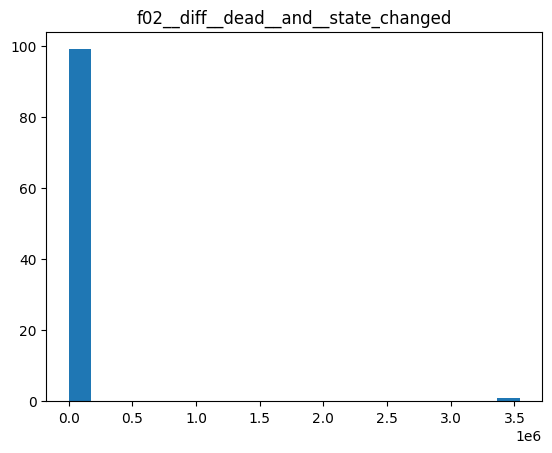

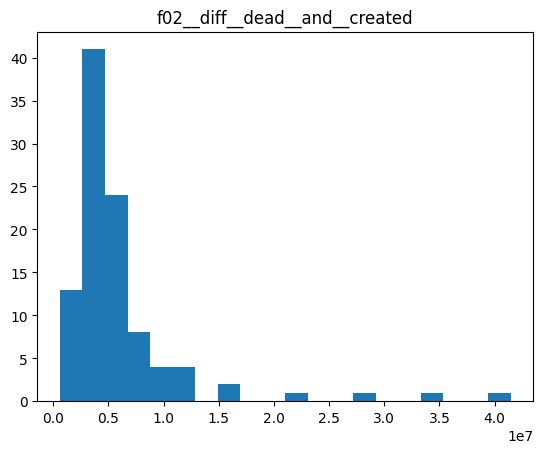

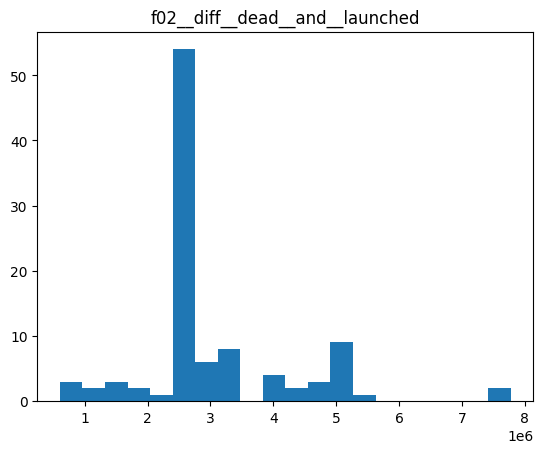

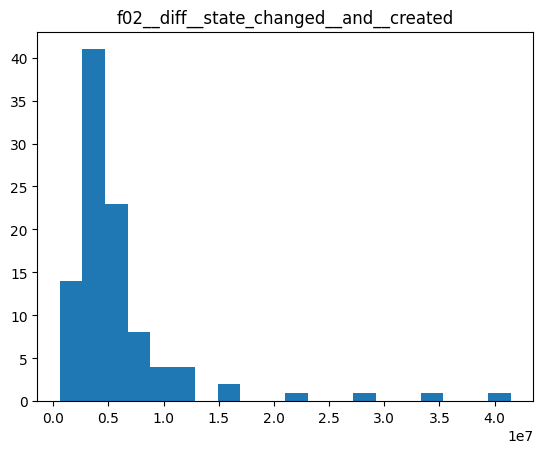

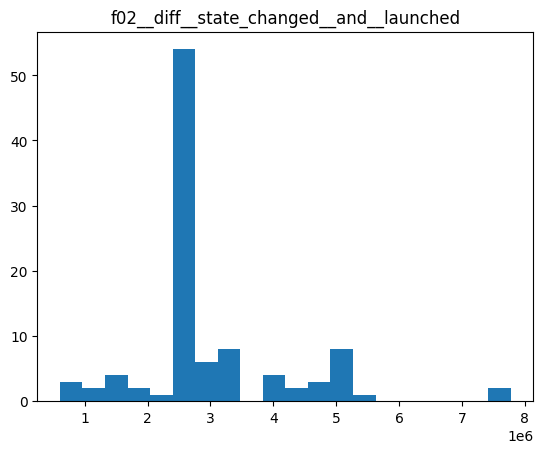

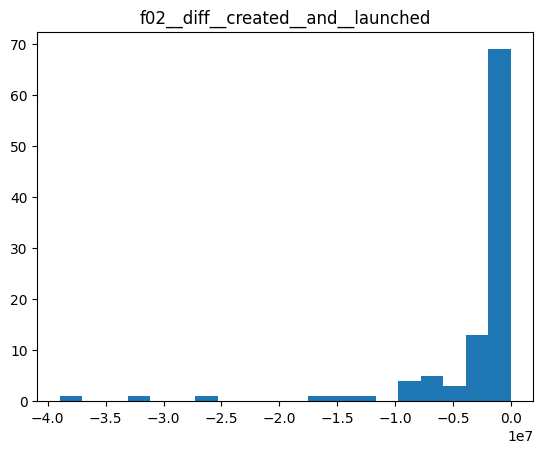

In [17]:
import matplotlib.pyplot as plt

for col in df_tmp.columns:
    if "f02__diff" in col:
        plt.hist(
            df_tmp[col], bins=20
        )
        plt.title(col)
        plt.show()

In [29]:
# 現段階のaccuracyはどんなもん？

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## データ分割
data_train, data_val = train_test_split(
    df_tmp, test_size=0.2, random_state=42, shuffle=True
)

y_name = "final_status"
X_train, y_train = data_train.drop(y_name, axis="columns"), data_train[y_name]
X_val, y_val = data_val.drop(y_name, axis="columns"), data_val[y_name]

## モデル定義・学習
model = RandomForestClassifier()
model.fit(X_train, y_train)

## 予測値作成
y_pred = model.predict(X_val)

## 評価
metrics = classification_report(
    y_true=y_val, y_pred=y_pred
)

In [30]:
print(metrics)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     10260
           1       0.45      0.31      0.37      4878

    accuracy                           0.66     15138
   macro avg       0.58      0.57      0.57     15138
weighted avg       0.63      0.66      0.64     15138



In [79]:
# 現段階のaccuracyはどんなもん？
# 暫定提出データの作成
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df_train = pd.read_csv("/Users/henmi_note/Desktop/signate2/output/02__preprocessed/train.csv")
df_test = pd.read_csv("/Users/henmi_note/Desktop/signate2/output/02__preprocessed/test.csv")

y_name = "final_status"
X_train, y_train = df_train.drop(y_name, axis="columns"), df_train[y_name]
X_test = df_test

## モデル定義・学習
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
## 予測値作成
y_pred = model.predict(X_test)

In [107]:
type(y_pred)

import numpy as np

np.save(
    file="../output/98__RawPred/tmo.npy",
    arr=y_pred,
)

In [ ]:
df_train = pd.read_csv("/Users/henmi_note/Desktop/signate2/output/02__preprocessed/train.csv")
df_test = pd.read_csv("/Users/henmi_note/Desktop/signate2/output/02__preprocessed/test.csv")

In [ ]:
## 提出データ整形
submission_index = pd.read_csv("../data/test.csv")

df_submission = pd.DataFrame(
    y_pred, index=submission_index["id"].values
)
df_submission.to_csv(
    "../output/99_Submision/0804_2053__submit.csv", header=None
)

In [104]:
feat__inp = {
    f: v for f, v in zip(model.feature_names_in_, model.feature_importances_)
}

pd.Series(feat__inp).sort_values()

f03__currency__NOK                         0.000119
f03__country__NO                           0.000126
f03__country__IE                           0.000220
f03__country__DK                           0.000237
f03__country__SE                           0.000257
f03__currency__DKK                         0.000264
f03__currency__SEK                         0.000269
f03__country__NZ                           0.000331
f03__currency__NZD                         0.000354
f03__country__NL                           0.000456
f03__currency__EUR                         0.000534
f03__country__AU                           0.000741
f03__currency__AUD                         0.000839
f03__currency__CAD                         0.001053
f03__country__CA                           0.001087
f03__country__GB                           0.001425
f03__currency__GBP                         0.001452
f03__country__US                           0.002517
f03__currency__USD                         0.002710
f02__diff__d

In [124]:
# 時刻に関するEDA
df_train = pd.read_csv(
    "../data/train.csv"
)
df_test = pd.read_csv(
    "../data/test.csv"
)

In [126]:
df_test.columns

Index(['id', 'name', 'desc', 'goal', 'keywords', 'disable_communication',
       'country', 'currency', 'deadline', 'state_changed_at', 'created_at',
       'launched_at'],
      dtype='object')

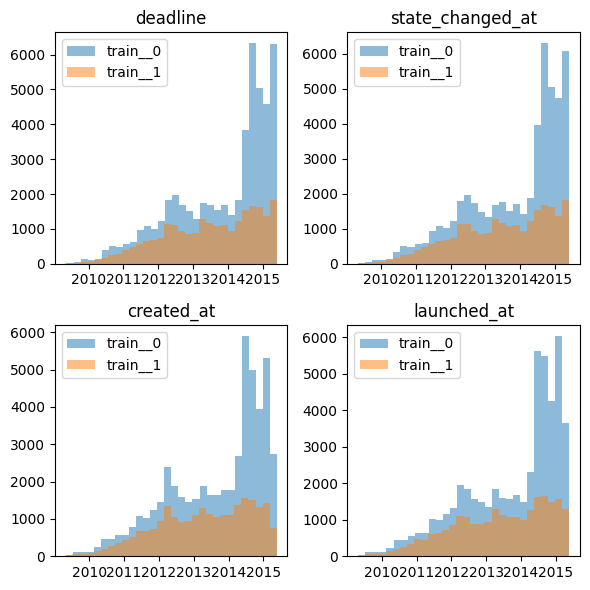

In [202]:
# 時刻に関するEDA
# train, test で分布はあんまり変わらなさそう
import datetime
import matplotlib.pyplot as plt

# figures var
fig = plt.figure(figsize=(6,6))
axes = fig.subplots(nrows=2, ncols=2)

train_test = ["train", "test"]

for feat, ax in zip(
    ['deadline', 'state_changed_at', 'created_at', 'launched_at'],
    axes.flat
):
    dt = {
        k: df[feat].apply(datetime.datetime.fromtimestamp) for k, df in zip(
            train_test, [df_train, df_test]
        )
    }

    dt_split = {
        k: [
            dt[k][df_train["final_status"]==0], dt[k][df_train["final_status"]==1]
        ] for k in train_test
    }

    k = "train"
    ax.hist(dt_split[k][0], bins=30, label=f"{k}__0", alpha=0.5)
    ax.hist(dt_split[k][1], bins=30, label=f"{k}__1", alpha=0.5)
    ax.legend()
    # ax.set_xticks()
    ax.set_title(feat)
fig.tight_layout()

In [218]:
df_train["desc"][df_train["country"] == "NO"].iloc[23]

'A musical comedy about two young musical artists who go to New York to break through on Broadway.'

In [203]:
train_test = ["train", "test"]

df_train = pd.read_csv(
    "../data/train.csv"
)
df_test = pd.read_csv(
    "../data/test.csv"
)
dfs = {
    k: df_ for k, df_ in zip(
        train_test, [df_train, df_test]
    )
}

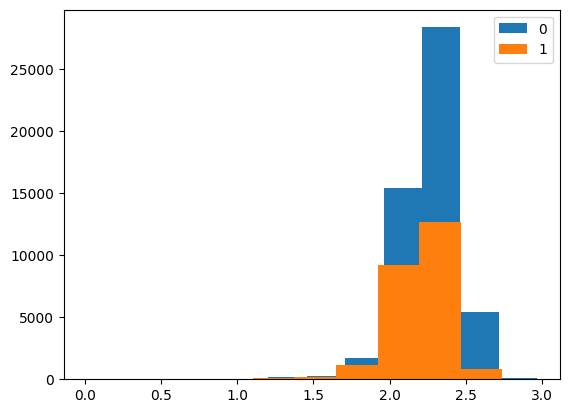

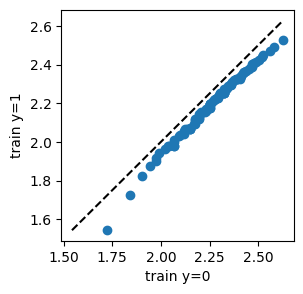

Text(0, 0.5, 'test')

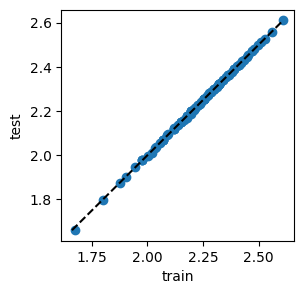

In [209]:
# goal のEDA
# goal は通貨間変換実施後のデータでEDA
train_test = ["train", "test"]

df_train_processed = pd.read_csv(
    "../output/02__preprocessed/train.csv"
)
df_test_processed = pd.read_csv(
    "../output/02__preprocessed/test.csv"
)
df_processed = {
    k: df_processed_ for k, df_processed_ in zip(
        train_test, [df_train_processed, df_test_processed]
    )
}

goal_log = {
    k: df_processed_["f01__goal"].apply(np.log1p) for k, df_processed_ in df_processed.items()
}

# k: train_test
k = "train"
for label in [0, 1]:
    plt.hist(
        goal_log[k][df_processed[k]["final_status"]==label], label=label
    )
    plt.legend()
plt.show()
## QQプロット 目的変数で分割
quantiles = np.linspace(0.01, 0.99, 99)
x = goal_log["train"][dfs["train"]["final_status"]==0].dropna()
y = goal_log["train"][dfs["train"]["final_status"]==1].dropna()

x_quantiles = np.quantile(x, quantiles)
y_quantiles = np.quantile(y, quantiles)

plt.figure(figsize=(3, 3))
plt.plot(x_quantiles, y_quantiles, 'o')
min_val = min(x_quantiles.min(), y_quantiles.min())
max_val = max(x_quantiles.max(), y_quantiles.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 45度線
plt.xlabel("train y=0")
plt.ylabel("train y=1")
plt.show()

## QQプロット train, testで分割
quantiles = np.linspace(0.01, 0.99, 99)
x = goal_log["train"].dropna()
y = goal_log["test"].dropna()

x_quantiles = np.quantile(x, quantiles)
y_quantiles = np.quantile(y, quantiles)

plt.figure(figsize=(3, 3))
plt.plot(x_quantiles, y_quantiles, 'o')
min_val = min(x_quantiles.min(), y_quantiles.min())
max_val = max(x_quantiles.max(), y_quantiles.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 45度線
plt.xlabel("train")
plt.ylabel("test")


In [197]:
train_test = ["train", "test"]

df_train = pd.read_csv(
    "../data/train.csv"
)
df_test = pd.read_csv(
    "../data/test.csv"
)
dfs = {
    k: df_ for k, df_ in zip(
        train_test, [df_train, df_test]
    )
}

In [ ]:
# 時刻系特徴量の差分のEDA
feats = [feat for feat in df_processed["train"].columns if "f02__diff" in feat]
df_times = {
    k: df_processed[k][feats] for k in train_test
}

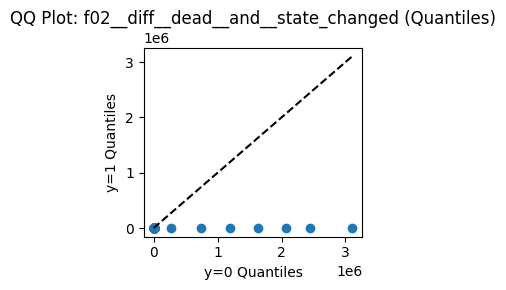

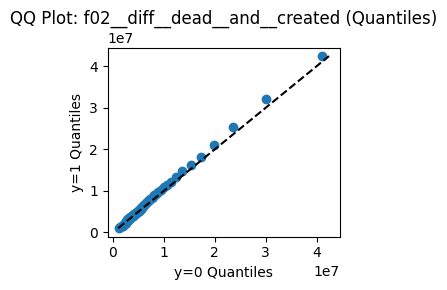

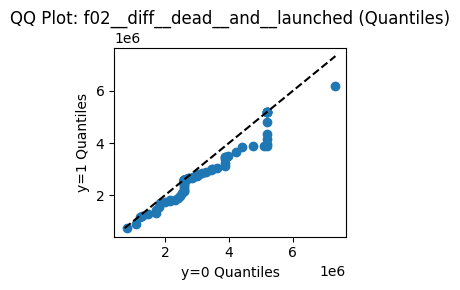

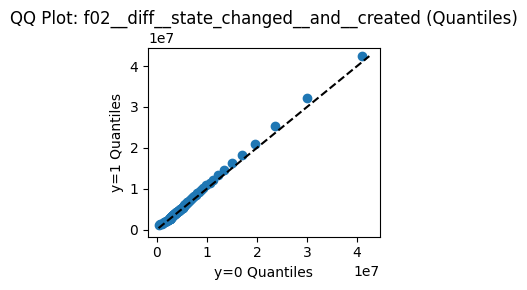

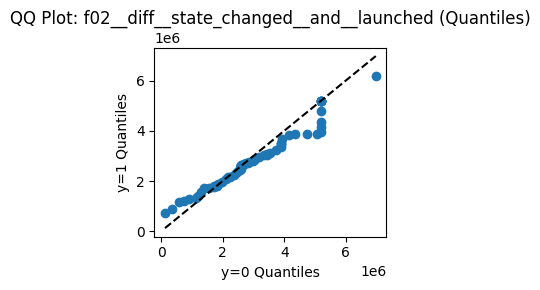

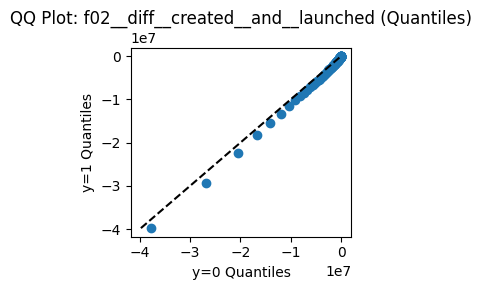

In [201]:
import numpy as np
import matplotlib.pyplot as plt

quantiles = np.linspace(0.01, 0.99, 99)  # 1%〜99%

for feat in feats:
    x = df_times["train"][feat][dfs["train"]["final_status"]==0].dropna()
    y = df_times["train"][feat][dfs["train"]["final_status"]==1].dropna()

    x_quantiles = np.quantile(x, quantiles)
    y_quantiles = np.quantile(y, quantiles)

    plt.figure(figsize=(3, 3))
    plt.plot(x_quantiles, y_quantiles, 'o')
    min_val = min(x_quantiles.min(), y_quantiles.min())
    max_val = max(x_quantiles.max(), y_quantiles.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 45度線
    plt.title(f"QQ Plot: {feat} (Quantiles)")
    plt.xlabel("y=0 Quantiles")
    plt.ylabel("y=1 Quantiles")
    plt.tight_layout()
    plt.show()


In [ ]:
## 時刻系、相関係数がわかったら良いのでは？
dfs["train"][["deadline", "state_changed_at", "created_at", "launched_at"]].corr()

,deadline,state_changed_at,created_at,launched_at
deadline,1.000000,0.999932,0.984071,0.999675
state_changed_at,0.999932,1.000000,0.983993,0.999645
created_at,0.984071,0.983993,1.000000,0.984515
launched_at,0.999675,0.999645,0.984515,1.000000


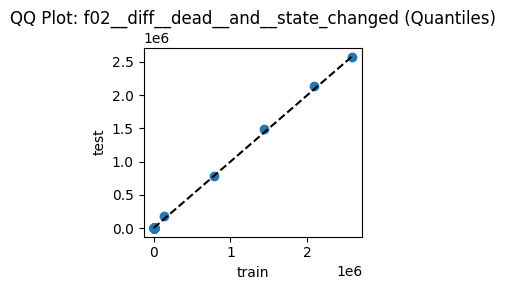

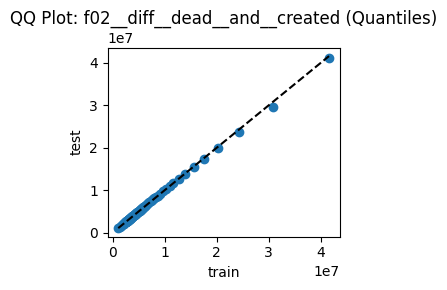

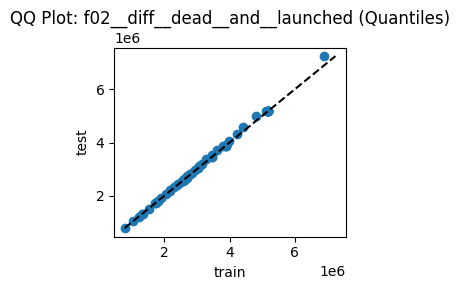

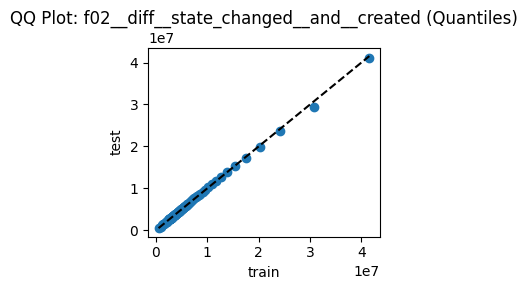

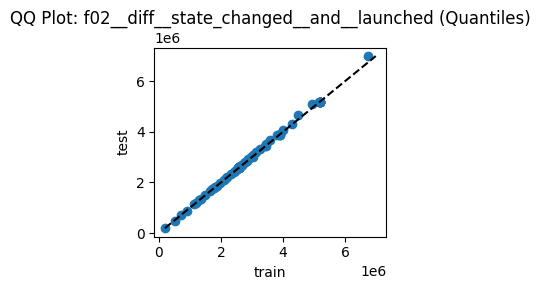

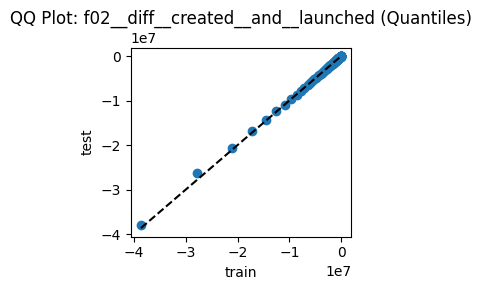

In [210]:
import numpy as np
import matplotlib.pyplot as plt

quantiles = np.linspace(0.01, 0.99, 99)  # 1%〜99%

for feat in feats:
    x = df_times["train"][feat]
    y = df_times["test"][feat]

    x_quantiles = np.quantile(x, quantiles)
    y_quantiles = np.quantile(y, quantiles)

    plt.figure(figsize=(3, 3))
    plt.plot(x_quantiles, y_quantiles, 'o')
    min_val = min(x_quantiles.min(), y_quantiles.min())
    max_val = max(x_quantiles.max(), y_quantiles.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 45度線
    plt.title(f"QQ Plot: {feat} (Quantiles)")
    plt.xlabel("train")
    plt.ylabel("test")
    plt.tight_layout()
    plt.show()


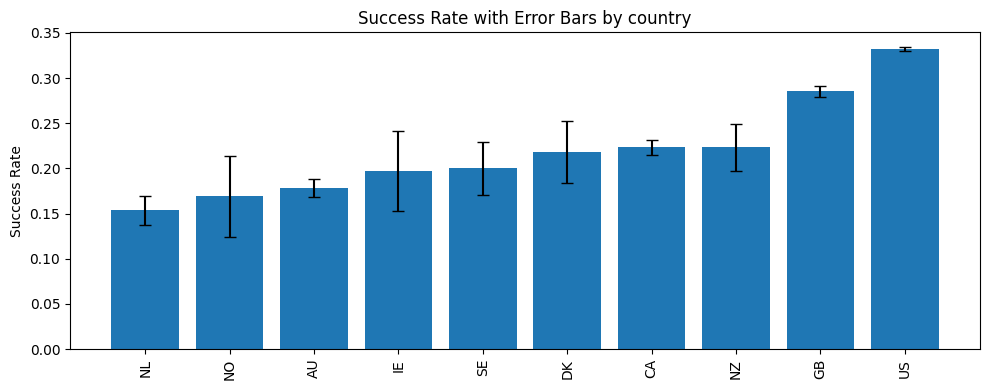

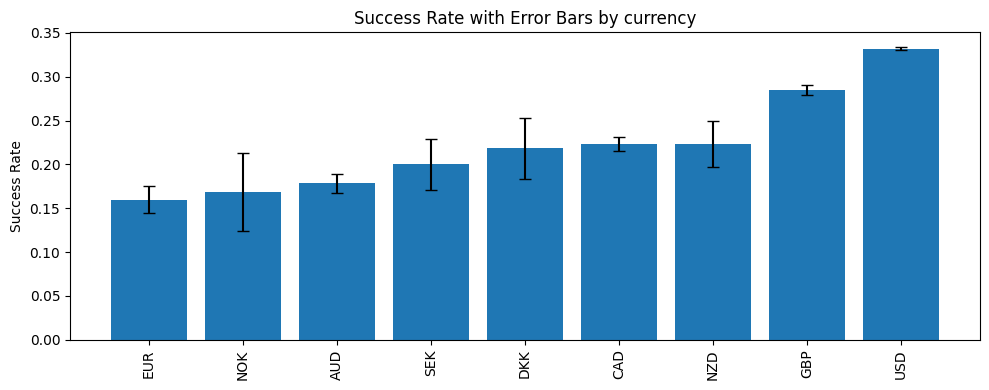

In [235]:
for comb in combs:
    df_pv = pd.pivot_table(
        tmp, index=comb[0], columns=comb[1], values="dummy", aggfunc="sum"
    )

    # 成功率（成功 / 全体）
    success = df_pv[1].fillna(0)
    failure = df_pv[0].fillna(0)
    total = success + failure
    p_hat = success / total
    se = np.sqrt(p_hat * (1 - p_hat) / total)

    # 成功率でソート
    p_hat_sorted = p_hat.sort_values()
    se_sorted = se[p_hat_sorted.index]  # ソート順に合わせてseも並び替え

    # プロット
    plt.figure(figsize=(10, 4))
    plt.bar(x=p_hat_sorted.index, height=p_hat_sorted.values, yerr=se_sorted.values, capsize=4)
    plt.ylabel("Success Rate")
    plt.title(f"Success Rate with Error Bars by {comb[0]}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [243]:
# disable_communication
tmp = dfs["train"].copy()
tmp["dummy"] = 1
df_pv = pd.pivot_table(
    tmp, index="disable_communication", columns="final_status", values="dummy", aggfunc="sum"
)
df_pv

final_status,0,1
disable_communication,,
False,51288.0,24185.0
True,217.0,NaN


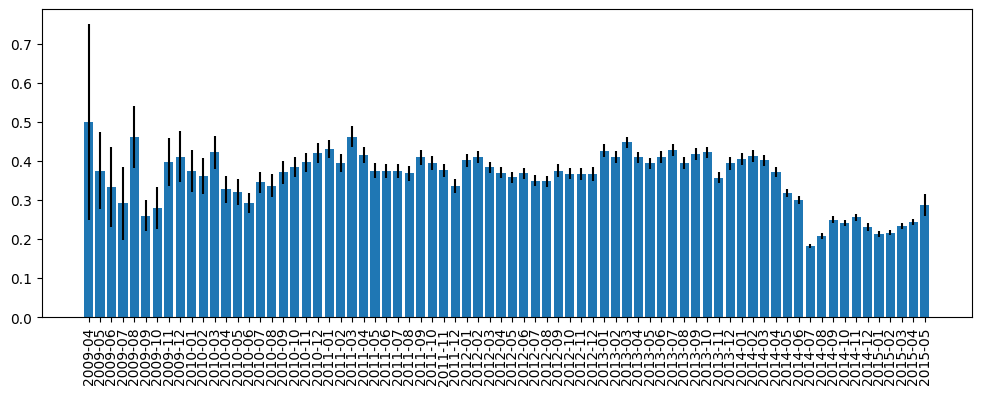

In [300]:
# ↑年次で成功率だいぶ違うのでは？？

df_tmp = dfs["train"][["final_status", "launched_at"]].copy()
df_tmp["dt"] = df_tmp["launched_at"].apply(datetime.datetime.fromtimestamp)
df_tmp["dummy"] = 1
df_tmp["year-month"] = df_tmp["dt"].apply(lambda x: f"{x.year}-{str(x.month).zfill(2)}")
df_pv = pd.pivot_table(
    df_tmp, index="year-month", columns="final_status", values="dummy", aggfunc="sum"
)

df_pv["total"] = df_pv[0] + df_pv[1]
df_pv["comp"] = df_pv[1] / df_pv["total"]

df_pv

df_pv["se_p"] = np.sqrt(
    df_pv["comp"] * (1 - df_pv["comp"]) / df_pv["total"]
)

plt.figure(figsize=(12, 4))
plt.bar(
    x = df_pv.index,
    height=df_pv["comp"],
    yerr = df_pv["se_p"]
)
plt.xticks(rotation=90)
plt.show()

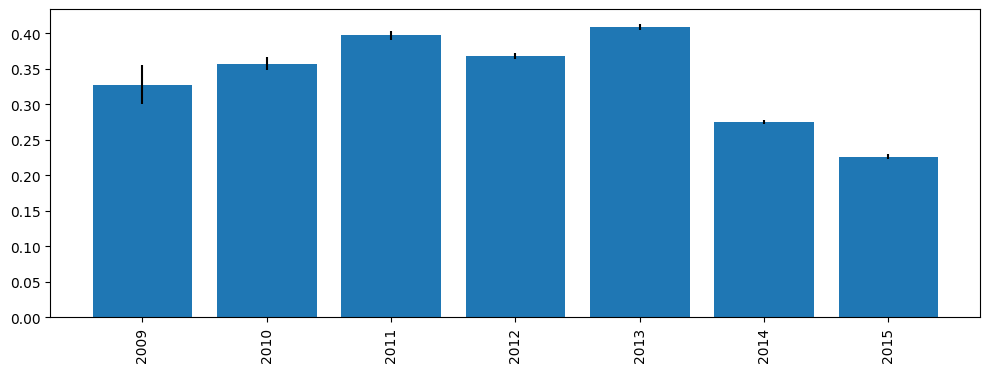

In [304]:
# ↑年次で成功率だいぶ違うのでは？？

datetime_feat = "deadline"
df_tmp = dfs["train"][["final_status", datetime_feat]].copy()
df_tmp["dt"] = df_tmp[datetime_feat].apply(datetime.datetime.fromtimestamp)
df_tmp["dummy"] = 1
df_tmp["year"] = df_tmp["dt"].apply(lambda x: f"{str(x.year).zfill(4)}")
df_pv = pd.pivot_table(
    df_tmp, index="year", columns="final_status", values="dummy", aggfunc="sum"
)

df_pv["total"] = df_pv[0] + df_pv[1]
df_pv["comp"] = df_pv[1] / df_pv["total"]

df_pv

df_pv["se_p"] = np.sqrt(
    df_pv["comp"] * (1 - df_pv["comp"]) / df_pv["total"]
)

plt.figure(figsize=(12, 4))
plt.bar(
    x = df_pv.index,
    height=df_pv["comp"],
    yerr = df_pv["se_p"]
)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_tmp = df_train[["goal", "final_status"]].copy()
df_tmp["goal"] = df_tmp["goal"].apply(np.log1p)

,goal,final_status
0,9.328212,0
1,7.650169,0
2,7.601402,0
3,8.294300,0
4,10.596660,0
...,...,...
75685,10.819798,1
75686,9.741027,0
75687,8.517393,0
75688,9.210440,0


In [328]:
df_tmp["goal"].describe()
df_goal_cut = pd.cut(
    df_tmp["goal"], bins=np.linspace(0, 20, 21)
)
df_tmp["goal_label"] = df_goal_cut.values
df_tmp["dummy"] = 1
df_pv = pd.pivot_table(
    df_tmp, index="goal_label", columns="final_status", values="dummy", aggfunc="sum"
)

In [331]:


df_pv["total"] = df_pv[0] + df_pv[1]
df_pv = df_pv[df_pv["total"] > 0]
df_pv["comp"] = df_pv[1] / df_pv["total"]

/var/folders/xj/v0451d5523l6w927tv6n01_w0000gn/T/ipykernel_31149/489346544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pv["total"] = df_pv[0] + df_pv[1]


In [332]:
df_pv

final_status,0,1,total,comp,se_p
goal_label,,,,,
"(0.0, 1.0]",22,38,60,0.633333,0.062212
"(1.0, 2.0]",12,27,39,0.692308,0.073905
"(2.0, 3.0]",90,81,171,0.473684,0.038183
"(3.0, 4.0]",259,193,452,0.426991,0.023266
"(4.0, 5.0]",416,310,726,0.426997,0.018358
"(5.0, 6.0]",1411,1269,2680,0.473507,0.009645
"(6.0, 7.0]",5517,4093,9610,0.425911,0.005044
"(7.0, 8.0]",7522,4764,12286,0.387758,0.004396
"(8.0, 9.0]",15319,7248,22567,0.321177,0.003108


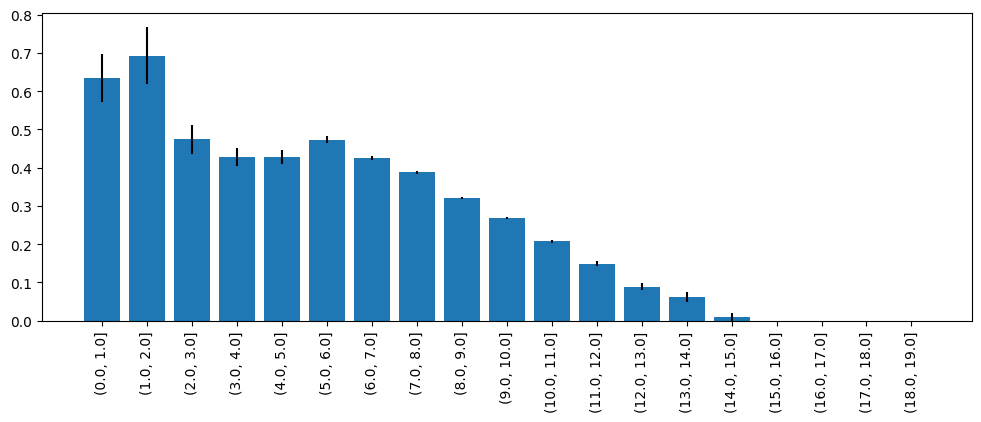

In [338]:
plt.figure(figsize=(12, 4))
plt.bar(
    x = [str(v) for v in df_pv.index],
    height=df_pv["comp"],
    yerr = df_pv["se_p"]
)
plt.xticks(rotation=90)
plt.show()